In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('LLDB-data.csv', delimiter='|')
df.head()

,Unnamed: 0,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice
0,0,1,9,11,0.00,4.67,0,0,1,0,0,1
1,1,1,9,11,0.62,4.98,0,0,0,1,0,0
2,2,1,9,11,0.31,5.38,0,0,0,0,1,0
3,3,1,9,11,0.00,4.98,0,0,0,0,0,0
4,4,2,9,29,0.00,4.67,0,0,1,0,0,0


In [42]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [43]:
df.head()

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice
0,1,9,11,0.00,4.67,0,0,1,0,0,1
1,1,9,11,0.62,4.98,0,0,0,1,0,0
2,1,9,11,0.31,5.38,0,0,0,0,1,0
3,1,9,11,0.00,4.98,0,0,0,0,0,0
4,2,9,29,0.00,4.67,0,0,1,0,0,0


In [44]:
# Columns to convert to boolean
boolean_columns = ['Feature', 'Display', 'Tide', 'Wisk', 'Era', 'Choice']

# Convert columns to boolean
df[boolean_columns] = df[boolean_columns].astype(bool)

### Verify that there are 52 households and 348 purchase occasions (true)

In [45]:
df.Household.nunique()

52

In [46]:
df.Occasion.nunique()

348

In [47]:
df.Week.nunique()

52

### Regardless of brand, determine overall average price and percentage of time/occasions brands were on feature and on display

In [48]:
df['Price'].mean()

5.40455459770115

In [49]:
df['Feature'].sum()

87

87/1392 * 100% = 6.25% of time

In [50]:
df['Display'].sum()

136

136/1392 * 100% = 9.7% of time

### Create a new column “Brand” reporting a 1-4 number representing the brand relevant for each observation (1=Tide, 2=Wisk, 3=Era, and 4=Surf)

In [51]:
# Create the 'Brand' column 
df['Brand'] = df[['Tide', 'Wisk', 'Era']].idxmax(axis=1).map({'Tide': 1, 'Wisk': 2, 'Era': 3})


In [52]:
# For rows where all the values are 0 (no brand selected), assign 4 (for Surf)
df['Brand'] = df.apply(lambda row: 4 if (row['Tide'] == 0 and row['Wisk'] == 0 and row['Era'] == 0) else row['Brand'], axis=1)

df.head(10)

,Occasion,Household,Week,Loyalty,Price,Feature,Display,Tide,Wisk,Era,Choice,Brand
0,1,9,11,0.00,4.67,False,False,True,False,False,True,1
1,1,9,11,0.62,4.98,False,False,False,True,False,False,2
2,1,9,11,0.31,5.38,False,False,False,False,True,False,3
3,1,9,11,0.00,4.98,False,False,False,False,False,False,4
4,2,9,29,0.00,4.67,False,False,True,False,False,False,1
5,2,9,29,0.62,4.67,True,False,False,True,False,True,2
6,2,9,29,0.31,6.55,False,False,False,False,True,False,3
7,2,9,29,0.00,4.98,False,False,False,False,False,False,4
8,3,9,31,0.00,4.67,False,False,True,False,False,False,1
9,3,9,31,0.62,4.98,False,False,False,True,False,True,2


### Compute the market share for each brand in this dataset

In [53]:
# Function to determine the brand
def determine_brand(row):
    if row['Tide']:
        return 'Tide'
    elif row['Wisk']:
        return 'Wisk'
    elif row['Era']:
        return 'Era'
    else:
        return None

In [54]:
# Filter rows where Choice is True
result_df = df[df['Choice']].copy()

# Apply the brand determination function
result_df['Brand chosen'] = result_df.apply(determine_brand, axis=1)

result_df = result_df[['Occasion', 'Household', 'Week', 'Brand chosen']]
# Replace None values with 'Surf' in 'Brand chosen' column
result_df['Brand chosen'] = result_df['Brand chosen'].fillna('Surf')
# Reset the index for cleaner output
result_df.reset_index(drop=True, inplace=True)

result_df

,Occasion,Household,Week,Brand chosen
0,1,9,11,Tide
1,2,9,29,Wisk
2,3,9,31,Wisk
3,4,9,43,Wisk
4,5,9,45,Wisk
...,...,...,...,...
343,344,285,49,Wisk
344,345,289,5,Surf
345,346,289,14,Surf
346,347,289,32,Surf


In [55]:
# Count the number of times each brand was chosen
brand_counts = result_df['Brand chosen'].value_counts()

# Calculate the market share for each brand
market_share = (brand_counts / 348) * 100

market_share

Brand chosen
Wisk    51.436782
Tide    23.850575
Surf    12.643678
Era     12.068966
Name: count, dtype: float64

### Compute average price and feature/display frequency, separately for each brand

In [56]:
# Compute average price for each brand
average_price = df.groupby('Brand')['Price'].mean()
average_price

Brand
1    5.856753
2    4.651897
3    5.955891
4    5.153678
Name: Price, dtype: float64

Tide, Wisk, Era, Surf

In [57]:
feature_frequency = df.groupby('Brand')['Feature'].sum()
feature_frequency 

Brand
1    22
2    36
3     9
4    20
Name: Feature, dtype: int64

In [58]:
display_frequency = df.groupby('Brand')['Display'].sum()
display_frequency

Brand
1    49
2    61
3    11
4    15
Name: Display, dtype: int64

we can see that Wisk was featured and displayed the most

### Plot "purchases per week"

In [59]:
import matplotlib.pyplot as plt

In [60]:
purchases_per_week = df.groupby('Week')['Choice'].sum()
purchases_per_week

Week
1     18
2     13
3      7
4      9
5      7
6      8
7      9
8      5
9      4
10    13
11    16
12     2
13     5
14     7
15     7
16     5
17     6
18     2
19     7
20     1
21     8
22     3
23     5
24     2
25     2
26     5
27     7
28     4
29     5
30     4
31     5
32     8
33    10
34     4
35     4
36     8
37     8
38     2
39     7
40     7
41    11
42     9
43     8
44     5
45     9
46     2
47     9
48     6
49    10
50    11
51     3
52     6
Name: Choice, dtype: int64

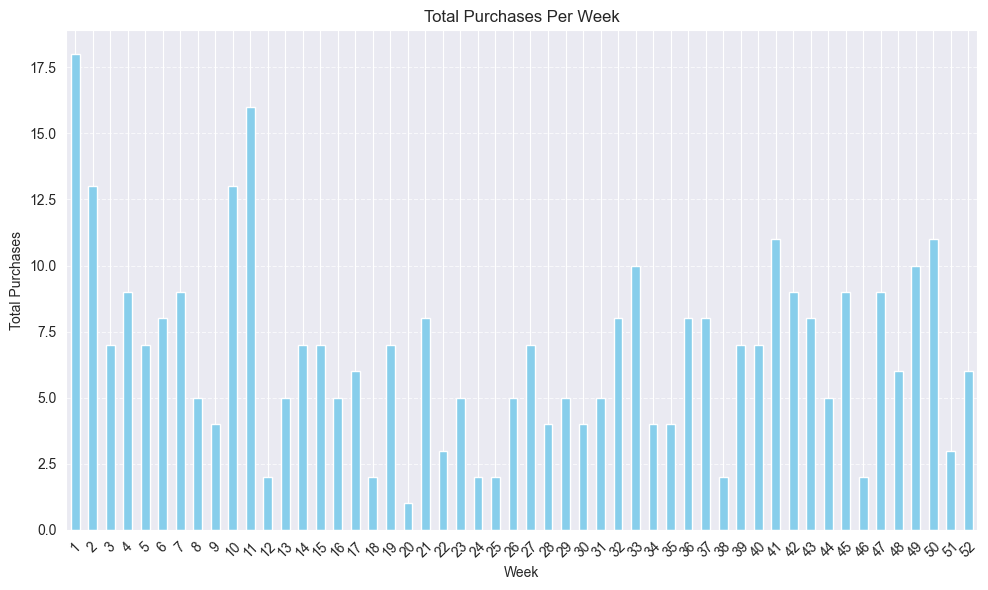

In [61]:
# Plotting the results
plt.figure(figsize=(10, 6))
purchases_per_week.plot(kind='bar', color='skyblue')
plt.title('Total Purchases Per Week')
plt.xlabel('Week')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)  # Rotate week labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to make room for labels

# Show the plot
plt.show()

### Find households that are most/least frequent buyers of liquid laundry detergent

In [62]:
# Group by household and count purchases
purchase_counts = df.groupby('Household')['Choice'].sum()
purchase_counts

Household
9       7
11      5
12      8
15      6
16      5
21      7
34      9
42     10
43      4
46      8
96      7
113     4
119     7
130     4
132     4
147     5
154    12
156     6
157     4
160     4
164     4
166     5
168     4
171     5
179     4
184     5
186     5
190     8
192     5
201    12
203    13
204     6
206     5
208    14
219    12
223     9
232     8
234     7
239     4
244     6
252     4
256     4
264     9
266     5
268     6
269    14
271     7
273     7
275     7
278     8
285     6
289     4
Name: Choice, dtype: int64

In [63]:
most_frequent_buyers = purchase_counts.nlargest(10)  # Top 10 households
most_frequent_buyers

Household
208    14
269    14
203    13
154    12
201    12
219    12
42     10
34      9
223     9
264     9
Name: Choice, dtype: int64

In [64]:
least_frequent_buyers = purchase_counts.nsmallest(10)  # Bottom 10 households
least_frequent_buyers

Household
43     4
113    4
130    4
132    4
157    4
160    4
164    4
168    4
179    4
239    4
Name: Choice, dtype: int64

### Do low prices increase sales (as one might expect)? Could this data help answer this question? Experiment with approaches (including graphical) to validate this hypothesis based on this dataset

In [65]:
# Group data by purchase (Choice) and calculate the average price for each group
average_prices = df.groupby('Choice')['Price'].mean()

print(average_prices)

Choice
False    5.557653
True     4.945259
Name: Price, dtype: float64


In [66]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import seaborn as sns

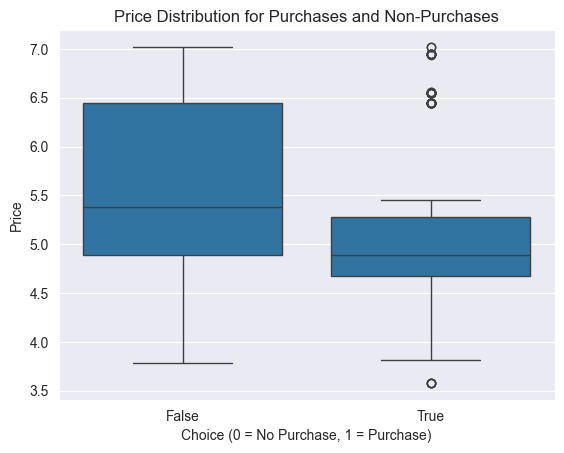

In [68]:
# Plot price distribution for purchases and non-purchases
sns.boxplot(x='Choice', y='Price', data=df)
plt.title('Price Distribution for Purchases and Non-Purchases')
plt.xlabel('Choice (0 = No Purchase, 1 = Purchase)')
plt.ylabel('Price')
plt.show()

In [69]:
df[['Price', 'Choice']].corr()

,Price,Choice
Price,1.000000,-0.301579
Choice,-0.301579,1.000000


### Do promotional features (like displays or discounts) impact sales?

In [70]:
# Group by Feature and calculate the percentage of products chosen
feature_sales = df.groupby('Feature')['Choice'].mean() * 100
feature_sales

Feature
False    22.681992
True     59.770115
Name: Choice, dtype: float64

In [71]:
display_sales = df.groupby('Display')['Choice'].mean() * 100
display_sales

Display
False    21.496815
True     57.352941
Name: Choice, dtype: float64

### Do loyal customers respond differently to promotions compared to non-loyal customers?

In [72]:
df['Loyal_Customer'] = df['Loyalty'] > 0.5

# Group by loyalty and promotions (Feature and Display) to calculate purchase rates
loyalty_feature_sales = df.groupby(['Loyal_Customer', 'Feature'])['Choice'].mean() * 100
loyalty_feature_sales

Loyal_Customer  Feature
False           False       8.118434
                True       44.067797
True            False      81.782946
                True       92.857143
Name: Choice, dtype: float64

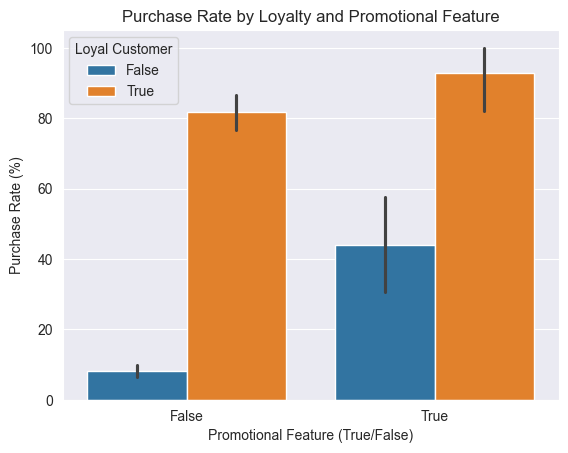

In [73]:
# Visualize purchase rates by loyalty and promotional feature
sns.barplot(x='Feature', y='Choice', hue='Loyal_Customer', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Purchase Rate by Loyalty and Promotional Feature')
plt.ylabel('Purchase Rate (%)')
plt.xlabel('Promotional Feature (True/False)')
plt.legend(title='Loyal Customer')
plt.show()

In [74]:
loyalty_display_sales = df.groupby(['Loyal_Customer', 'Display'])['Choice'].mean() * 100
loyalty_display_sales

Loyal_Customer  Display
False           False       7.396450
                True       39.130435
True            False      80.578512
                True       95.454545
Name: Choice, dtype: float64

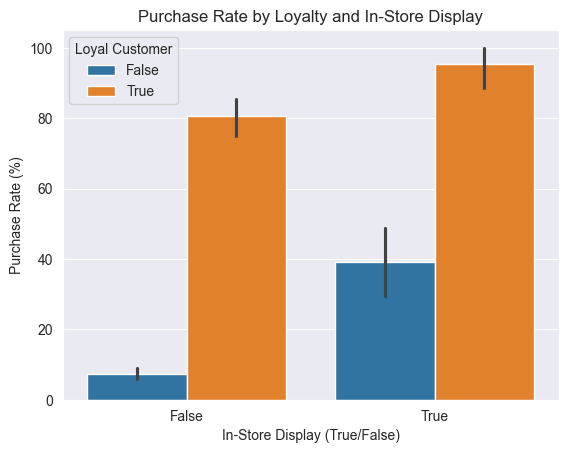

In [75]:
# Visualize purchase rates by loyalty and display
sns.barplot(x='Display', y='Choice', hue='Loyal_Customer', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Purchase Rate by Loyalty and In-Store Display')
plt.ylabel('Purchase Rate (%)')
plt.xlabel('In-Store Display (True/False)')
plt.legend(title='Loyal Customer')
plt.show()

example:
Let’s assume there're 100 loyal customers split between those who saw a display and those who didn’t:

50 customers saw a display (Display = True), and 47 of them made a purchase (95%).
50 customers didn’t see a display (Display = False), and 40 of them made a purchase (80%).

Basically purchasing rates of loyal customers are high either way (with or without promotion), it's only slightly higher in case of seeing the promotion. But for the rest (not loyal) promotion seems to be significantly more effective (though there're less purchases in total for this group).